In [4]:
import urllib.request
import pandas as pd

In [5]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7fc5a6427cd0>)

In [6]:
checkouts_df = pd.read_csv(checkout_file)

In [7]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016
9996,Digital,OverDrive,EBOOK,2018,1,1,The Book of Summer: A Novel,Michelle Gable,"Fiction, Historical Fiction, Literature",Macmillan Publishers,2017
9997,Physical,Horizon,BOOK,2018,1,1,Revival / Stephen King.,"King, Stephen, 1947-","Drug addicts Fiction, Clergy Fiction, Rock mus...","Thorndike Press,",2014.
9998,Physical,Horizon,BOOK,2018,1,4,Loula is leaving for Africa / written and illu...,"Villeneuve, Anne, 1966-","Imagination Juvenile fiction, Chauffeurs Juven...","Kids Can Press,",[2013]


In [8]:
checkouts_df["checkoutmonth"].unique()

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12])

# 1. Frage: Welche Titel wurden am häufigtsen ausgeliehen?

In [13]:
# Es liegen keine Daten von Juni und Juli vor
checkouts_df["checkouts"].max()

540

In [10]:
checkouts_df[checkouts_df["checkouts"] == 540]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
6577,Physical,Horizon,BOOK,2018,1,540,In the midst of winter : a novel / Isabel Alle...,"Allende, Isabel","College teachers Fiction, Women college teache...","Atria Books,",2017.


In [11]:
max_Anzahl = checkouts_df["checkouts"].max()

In [12]:
checkouts_df[checkouts_df["checkouts"] == max_Anzahl]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
6577,Physical,Horizon,BOOK,2018,1,540,In the midst of winter : a novel / Isabel Alle...,"Allende, Isabel","College teachers Fiction, Women college teache...","Atria Books,",2017.


# 2. Frage: Wie ist das Verhältnis von physischen zu digitalen Medien?

In [14]:
checkouts_df[checkouts_df["usageclass"] == "digital"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear


In [15]:
checkouts_df[checkouts_df["usageclass"] == "Digital"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,Children's,DHX Media,NaN
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
5,Digital,OverDrive,EBOOK,2018,1,1,Little Dorrit,Charles Dickens,"Classic Literature, Fiction, Literature","Random House, Inc.",2012
...,...,...,...,...,...,...,...,...,...,...,...
9989,Digital,OverDrive,EBOOK,2018,1,1,Face to Face: Amazing New Looks and Inspiratio...,Scott Barnes,"Health & Fitness, Nonfiction",Quarto Publishing Group USA,2012
9994,Digital,OverDrive,EBOOK,2018,1,1,This Is How It Happened,Paula Stokes,"Romance, Young Adult Fiction, Young Adult Lite...",HarperCollins Publishers Inc.,2017
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016
9996,Digital,OverDrive,EBOOK,2018,1,1,The Book of Summer: A Novel,Michelle Gable,"Fiction, Historical Fiction, Literature",Macmillan Publishers,2017


In [16]:
digital = checkouts_df[checkouts_df["usageclass"] == "Digital"]
physisch = checkouts_df[checkouts_df["usageclass"] == "Physical"]

In [17]:
checkouts_df["usageclass"].value_counts()

Physical    5995
Digital     4005
Name: usageclass, dtype: int64

In [18]:
digital.shape

(4005, 11)

In [19]:
physisch.shape

(5995, 11)

In [20]:
%matplotlib inline

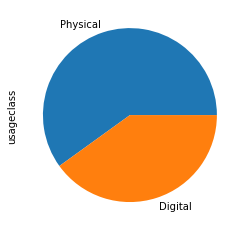

In [21]:
checkouts_df["usageclass"].value_counts().plot(kind="pie")

# Frage 3: Wie ist die Verteilung der Publikationsjahre?

In [22]:
checkouts_df["publicationyear"].value_counts()

2017              479
[2017]            418
2013              416
2014              343
[2016]            324
                 ... 
[2015?]             1
[2003, p2005]       1
[1966]              1
1960.               1
c1989-<c1994 >      1
Name: publicationyear, Length: 264, dtype: int64

In [24]:
checkouts_df["publicationyear"].value_counts().plot(kind="scatter")

ValueError: plot kind scatter can only be used for data frames

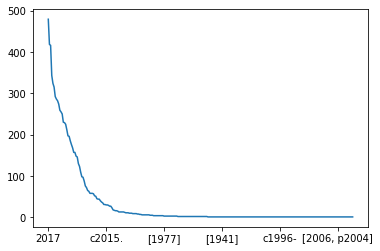

In [25]:
checkouts_df["publicationyear"].value_counts().plot(kind="line")

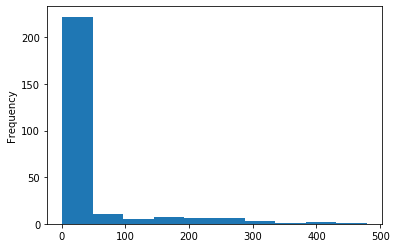

In [26]:
checkouts_df["publicationyear"].value_counts().plot(kind="hist")

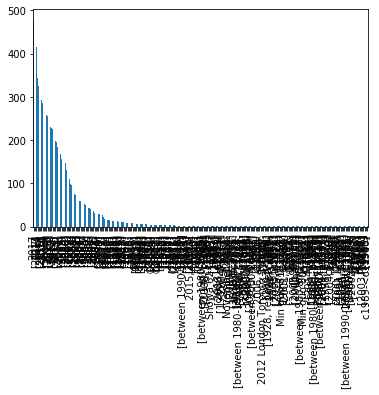

In [27]:
checkouts_df["publicationyear"].value_counts().plot(kind="bar")

In [ ]:
# Die Visualisierung ist nicht aussagekräftig. Dafür müssten die Daten erst bereinigt werden.